# Financial Derivatives Group Project (35 points of final grade)
In this assignment, you will have to answer questions by adding codes or markdowns in the cells provided.

### Question 1: simulate price path using the geometric Brownian motion [2 points]

The logarithm stock price under the geometric Brownian motion is given by:

$ S_{t} = S_{0}e^{(\mu - \frac{1}{2}\sigma^{2})t + \sigma{\epsilon\sqrt{t}}} $

where $\epsilon \sim \mathcal{N}(0,1)$.

Using the following parameters:

$ \mu = 0.1 $

$ N = 100 $

$ T = 10 $

$ dt = 10/100 = 0.1 $

$ S_0 = 100 $

**Simulate** price paths for $\sigma = 0, \sigma = 0.1, \sigma = 0.2$ using a random seed of 5 and *plot them on a diagram.

**Answer in the box below:**

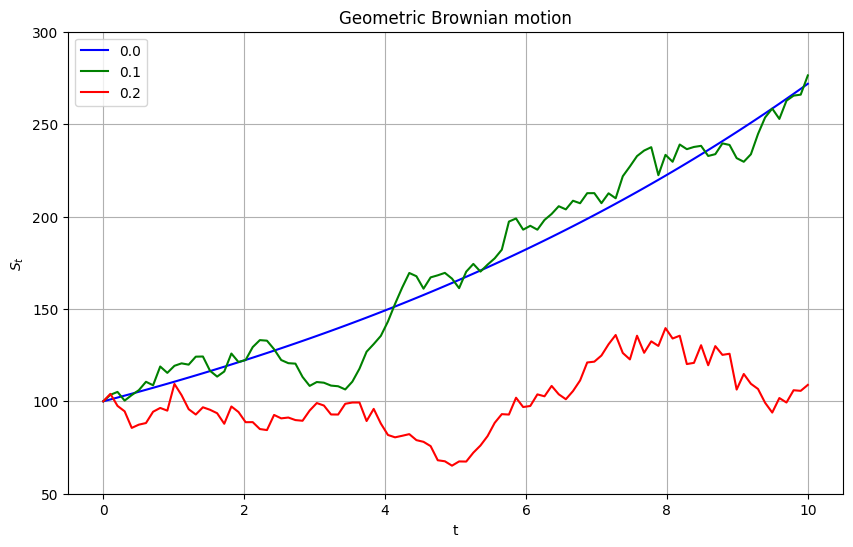

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

# Params
mu = 0.1      # drift
N = 100       # number of time steps
T = 10        # total time
dt = T/N      # time step size
S0 = 100      # initial stock price
t = np.linspace(0, T, N)  # time points

def simulate_gbm(S0, mu, sigma, T, N):
    dt = T/N
    t = np.linspace(0, T, N)
    epsilon = np.random.normal(0, 1, N)  # random normal variables
    
    # Initialize array for stock price
    S = np.zeros(N)
    S[0] = S0
    
    # Calculate price path
    for i in range(1, N):
        S[i] = S0 * np.exp((mu - 0.5 * sigma**2) * t[i] + sigma * np.sum(epsilon[:i]) * np.sqrt(dt))
    
    return S

# Simulate paths for different sigma values
sigma_values = [0.0, 0.1, 0.2]
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

# Plot each path
for sigma, color in zip(sigma_values, colors):
    S = simulate_gbm(S0, mu, sigma, T, N)
    plt.plot(t, S, color=color, label=f'{sigma:.1f}')

# Customize the plot
plt.title('Geometric Brownian motion')
plt.xlabel('t')
plt.ylabel('$S_t$')
plt.legend()
plt.grid(True)

plt.ylim(50, 300)

plt.show()

You should replicate the diagram below:
<img src="gbm.png">

### Question 2: applying the Itô's lemma [2 points]

Given the following Itô process:

$ dX_{t} = dW_{t} $ 

Apply the **Itô's lemma** to the following function:

$ f(X) = e^{2X} $


**Please fill in your answers below:**
$ f(X) = e^{2X} $

$ dX_t = dW_t \quad \Rightarrow \quad \mu = 0, \ \sigma = 1 $

$df(X_t) = \left( \frac{\partial f}{\partial X} \mu + \frac{1}{2} \frac{\partial^2 f}{\partial X^2} \sigma^2 \right) dt + \frac{\partial f}{\partial X} \sigma \, dW_t$

Compute derivatives: 
$
\frac{\partial f}{\partial X} = 2e^{2X}$
,
$\frac{\partial^2 f}{\partial X^2} = 4e^{2X}
$

Apply Itô's Lemma: 
$
df(X_t) = \left(0 + 0 \cdot 2e^{2X_t} + \frac{1}{2} \cdot 1^2 \cdot 4e^{2X_t}\right)dt + 1 \cdot 2e^{2X_t} dW_t $
,
$
df(X_t) = 2e^{2X_t} \, dt + 2e^{2X_t} \, dW_t
$

Final Result
$
d\bigl(e^{2X_t}\bigr) = 2e^{2X_t} \, dt + 2e^{2X_t} \, dW_t
$

### Question 3: applying the Itô's product rule [2 points]

Given the following three Itô processes for asset $X$, asset $Y$, and asset $Z$ respectively:

$ dX_{t} = \mu_{x}X_{t}dt + \sigma_{x}X_{t}dW^{x}_{t} $

$ dY_{t} = \mu_{y}Y_{t}dt + \sigma_{y}Y_{t}dW^{y}_{t} $

$ dZ_{t} = \mu_{z}Z_{t}dt + \sigma_{z}Z_{t}dW^{z}_{t} $

where $ dW^{x}_{t} $,  $ dW^{y}_{t} $, and $ dW^{z}_{t} $ are Brownian motions for asset $X$, asset $Y$, and asset $Z$ respectively with correlations $ \rho_{x,y} $ between $X$ and $Y$,  $ \rho_{x,z} $ between $X$ and $Z$, and $ \rho_{y,z} $ between $Y$ and $Z$.

Find the **differential** for the following function:

$ f(X,Y,Z) = X_{t}(Y_{t} + Z_{t}) $

**Please fill in your answers below:**

$df = (Y_{t} + Z_{t})  dX_{t} + X_{t}  dY_{t} + X_{t}  dZ_{t} + dX_{t}  dY_{t} + dX_{t}  dZ_{t}$

Substitute the Given Itô Processes:

$df = (Y_{t} + Z_{t}) \left( \mu_{x} X_{t}  dt + \sigma_{x} X_{t} dW_{Xt} \right)$ + $X{t} \left( \mu_{y} Y_{t}  dt + \sigma_{y} Y_{t} dW_{Yt} \right)$ + $X{t} \left( \mu_{z} Z_{t} , dt + \sigma_{z} Z_{t} dW_{Zt} \right)$  + $ \sigma{x} \sigma_{y} \rho_{x,y} X_{t} Y_{t}  dt$ + $\sigma_{x} \sigma_{z} \rho_{x,z} X_{t} Z_{t}  dt$

Expand and Simplify the Terms:

$df = X_{t} Y_{t} \mu_{x} dt + X_{t} Z_{t} \mu_{x}  dt + X_{t} \mu_{y} Y_{t} dt + X_{t} \mu_{z} Z_{t}  dt + \sigma_{x} X_{t} Y_{t} dW_{Xt} + \sigma{x} X_{t} Z_{t}  dW_{Yt} + \sigma{y} X_{t} Y_{t}  dW_{Yt} + \sigma{z} X_{t} Z_{t}  dW_{Zt} + \sigma{x} \sigma_{y} \rho_{x,y} X_{t} Y_{t}  dt + \sigma_{x} \sigma_{z} \rho_{x,z} X_{t} Z_{t}  dt$

 Factor Common Terms:

$df = X_{t} \left( Y_{t} + Z_{t} \right) \mu_{x} dt + X_{t} Y_{t} \mu_{y}  dt + X_{t} Z_{t} \mu_{z}  dt  + \sigma_{x} X_{t} \left( Y_{t} + Z_{t} \right)  dW^{x}{t} + \sigma{y} X_{t} Y_{t}  dW^{y}{t} + \sigma{z} X_{t} Z_{t}  dW^{z}{t} + \sigma{x} \sigma_{y} \rho_{x,y} X_{t} Y_{t}  dt + \sigma_{x} \sigma_{z} \rho_{x,z} X_{t} Z_{t}  dt$

Final Differential Expression:

$df(X, Y, Z) = (Y_{t} + Z_{t}) \mu_{x} X_{t}  dt + \mu_{y} X_{t} Y_{t} dt + \mu_{z} X_{t} Z_{t}  dt  + \sigma_{x} X_{t} (Y_{t} + Z_{t})  dW_{Xt} + \sigma{y} X_{t} Y_{t}  dW_{Yt} + \sigma{z} X_{t} Z_{t}  dW_{Zt}  + \sigma{x} \sigma_{y} \rho_{x,y} X_{t} Y_{t} dt + \sigma_{x} \sigma_{z} \rho_{x,z} X_{t} Z_{t} dt$

### Question 4: change of measure [2 points]

Given the following geometric Brownian motion with a risk-neutral drift term:

$ dS_{t} = rS_{t}dt + \sigma{S}_{t}dW^{\mathbb{Q}}_{t} $

a) Show that under measure $\mathbb{M}$, we can re-express the above dynamics into a **stochastic process with no drift**:

$ dS_{t} =\sigma{S}_{t}dW^{\mathbb{M}}_{t} $

b) Find the **Radon-Nikodym derivative** for changing the measure from $\mathbb{Q}$ to $\mathbb{M}$.

**Please fill in your answers below:**

(a).

Define the Drift Adjustment:

$dW^{\mathbb{M}}{t} = dW^{\mathbb{Q}}{t} + \theta \, dt$

Substitute  $dW^{\mathbb{Q}}_{t}$ :

$dS_{t} = r S_{t} \, dt + \sigma S_{t} (dW^{\mathbb{M}}{t} - \theta \, dt)$

Set Drift to Zero:

$\mathbb{M} :r - \sigma \theta = 0 \quad \Rightarrow \quad \theta = \frac{r}{\sigma}$

Resulting SDE Under  $\mathbb{M}$ :

$dS_{t} = \sigma S_{t} \, dW^{\mathbb{M}}{t}$

(b).

$\frac{d\mathbb{M}}{d\mathbb{Q}} \Bigg|{\mathcal{F}t} = \exp\left( -\theta W^{\mathbb{Q}}{t} - \frac{1}{2} \theta^{2} t \right)$

Given  $\theta = \frac{r}{\sigma} , substitute  \theta$ :

$\frac{d\mathbb{M}}{d\mathbb{Q}} \Bigg|{\mathcal{F}t} = \exp\left( -\frac{r}{\sigma} W^{\mathbb{Q}}{t} - \frac{1}{2} \left( \frac{r}{\sigma} \right)^{2} t \right)$

Alternatively, using  $W^{\mathbb{M}}_{t}$ :

$\frac{d\mathbb{M}}{d\mathbb{Q}} \Bigg|{\mathcal{F}t} = \exp\left( \theta W^{\mathbb{Q}}{t} - \frac{1}{2} \theta^{2} t \right)$


Substituting  $\theta = \frac{r}{\sigma}$ :

$\frac{d\mathbb{M}}{d\mathbb{Q}} \Bigg|{\mathcal{F}t} = \exp\left( \frac{r}{\sigma} W^{\mathbb{Q}}{t} - \frac{1}{2} \left( \frac{r}{\sigma} \right)^{2} t \right) $

### Question 5: Convergence of Binomial Option Pricing Model (3 points)

In this part, you will need the following two functions:
1. Binomial Option Pricing Model for pricing an European call option
2. Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the number of steps in the binomial tree. 

Finally, plot binomical call prices computed with different numbers of steps versus the BSM call price. An example output is attached below.

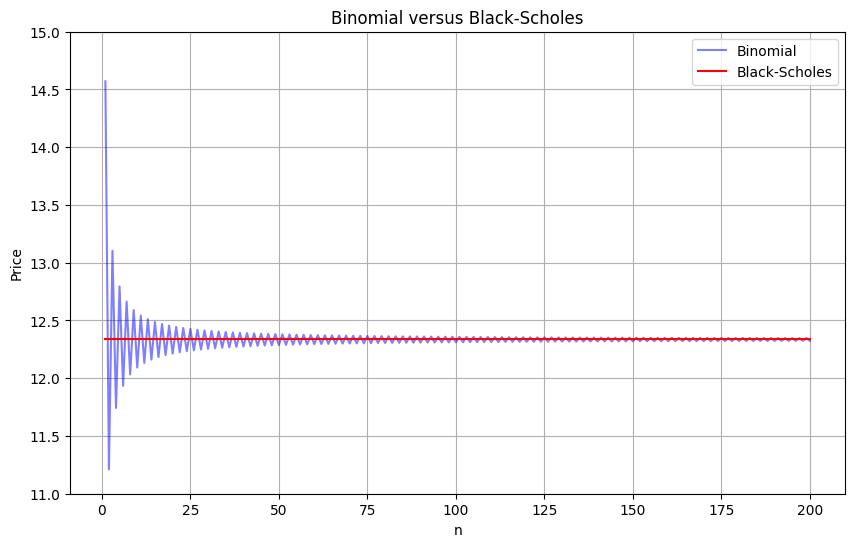

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math as m

# Given parameters
S = 100    # Stock price
K = 100    # Strike price
v = 0.25   # Volatility
r = 0.05   # Risk-free rate
T = 1      # Time to maturity

def black_scholes_call(S, K, T, r, v):
    """Calculate Black-Scholes call option price"""
    d1 = (np.log(S/K) + (r + v**2/2)*T) / (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    
    call = S*stats.norm.cdf(d1) - K*np.exp(-r*T)*stats.norm.cdf(d2)
    return call

def binomial_call(S, K, T, r, v, n):
    """Calculate Binomial Model call option price"""
    dt = T/n
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt) - d)/(u - d)  # risk netural prob 
    
    # Initialize asset prices at maturity
    prices = np.zeros(n+1)
    for j in range(n+1):
        prices[j] = S * (u**(n-j)) * (d**j)
    
    # Initialize option values at maturity
    values = np.maximum(prices - K, 0)
    
    # Backward recursion through the tree
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            values[j] = np.exp(-r*dt) * (p*values[j] + (1-p)*values[j+1])
    
    return values[0]

# Generate data points for comparison
n_values = np.arange(1, 201)  # Number of steps from 1 to 200
binomial_prices = [binomial_call(S, K, T, r, v, n) for n in n_values]
bs_price = black_scholes_call(S, K, T, r, v)
all_bs_price = [bs_price] * len(n_values)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot binomial prices in blue
plt.plot(n_values, binomial_prices, 'b-', alpha=0.5, label='Binomial')

# Plot Black-Scholes price in red
plt.plot(n_values, all_bs_price, 'r-', label='Black-Scholes')

plt.title('Binomial versus Black-Scholes')
plt.xlabel('n')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Set y-axis limits to match the example
plt.ylim(11, 15)

plt.show()

Your output should be similar to:

<img src="binomial_convergence.png"  style="width: 500px;"/>

### Question 6: Stairway bull spread (6 points)

#### (a) Replicate the following payoff diagram [1 out of 6 points]

<img src="stairway1.png"  style="width: 500px;"/>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bull_spread(num_steps=1000, lower_strike=2, upper_strike=8, max_payoff=6):
    """
    Generate and plot bull spread payoff diagrams
    
    Parameters:
    -----------
    num_steps : int
        Number of steps for the stairway bull spread
    lower_strike : float
        Lower strike price
    upper_strike : float
        Upper strike price
    max_payoff : float
        Maximum payoff value
    """
    # Generate stock prices
    stock_prices = np.linspace(0, 10, 1000)
    
    # Calculate regular bull spread payoff
    bull_spread = np.maximum(0, stock_prices - lower_strike) - np.maximum(0, stock_prices - upper_strike)
    
    # Calculate stairway bull spread
    step_size = (upper_strike - lower_strike) / num_steps
    stairway_bull_spread = np.zeros_like(stock_prices)
    
    for i, price in enumerate(stock_prices):
        if price < lower_strike:
            stairway_bull_spread[i] = 0
        elif price > upper_strike:
            stairway_bull_spread[i] = max_payoff
        else:
            steps_completed = int((price - lower_strike) / step_size)
            stairway_bull_spread[i] = steps_completed * step_size * (max_payoff / (upper_strike - lower_strike))
    
    # Calculate average payoffs at stock price = 5
    bull_spread_value = np.interp(5, stock_prices, bull_spread)
    stairway_value = np.interp(5, stock_prices, stairway_bull_spread)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, bull_spread, label='Bull spread', color='blue', alpha=0.9)
    plt.plot(stock_prices, stairway_bull_spread, label='Stairway bull spread', color='red', alpha=0.9)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Stock price')
    plt.ylabel('Payoff')
    plt.title('Stairway bull spread')
    plt.legend()
    
    plt.xlim(0, 10)
    plt.ylim(0, 7)
    
    return plt.gcf()

Text(0.5, 1.0, 'Stairway Bull Spread (2 steps)')

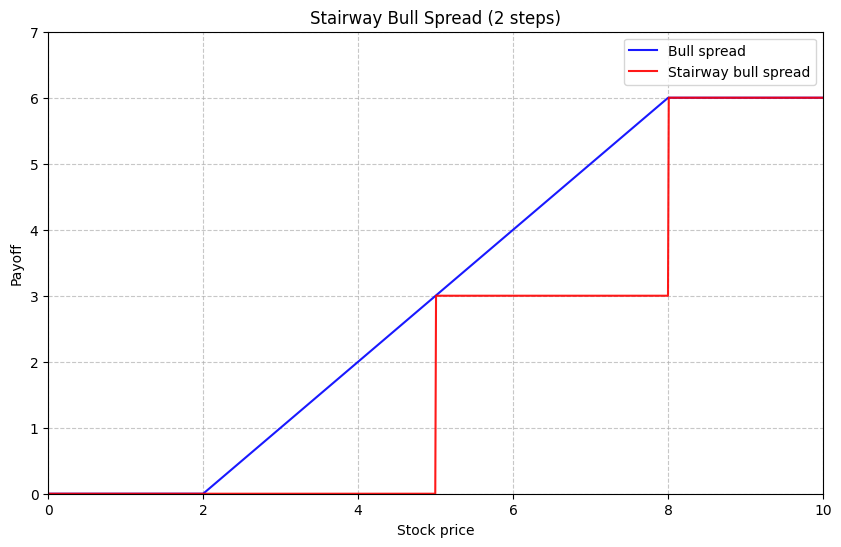

In [18]:
# For original plot (2 steps)
plot_bull_spread(num_steps=2)
plt.title('Stairway Bull Spread (2 steps)')

#### (b) Modify your code in (a) to allow user changing the number of steps in the stairway bull spread [2 out of 6 points]

#### For a step size of 1 (6 steps in total), your output should be similar to:
<img src="stairway2.png" style="width: 500px;"/>

Text(0.5, 1.0, 'Stairway Bull Spread (6 steps)')

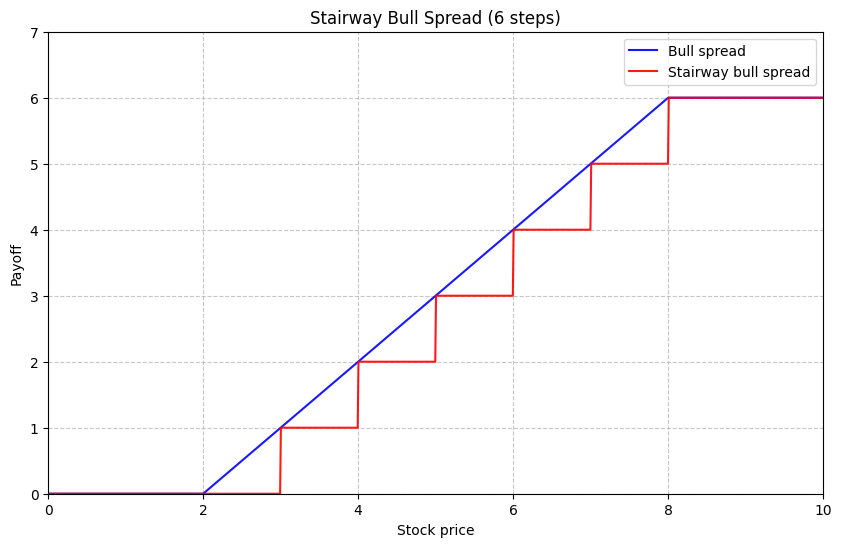

In [17]:
### your code for 6(b) ###
# For intermediate plot (6 steps)
plot_bull_spread(num_steps=6)
plt.title('Stairway Bull Spread (6 steps)')

#### (c) After increasing the number of steps in the stairway bull spread to 1000, compute the price of the bull spread and the price of the stairway bull spread analytically [3 out of 6 points]

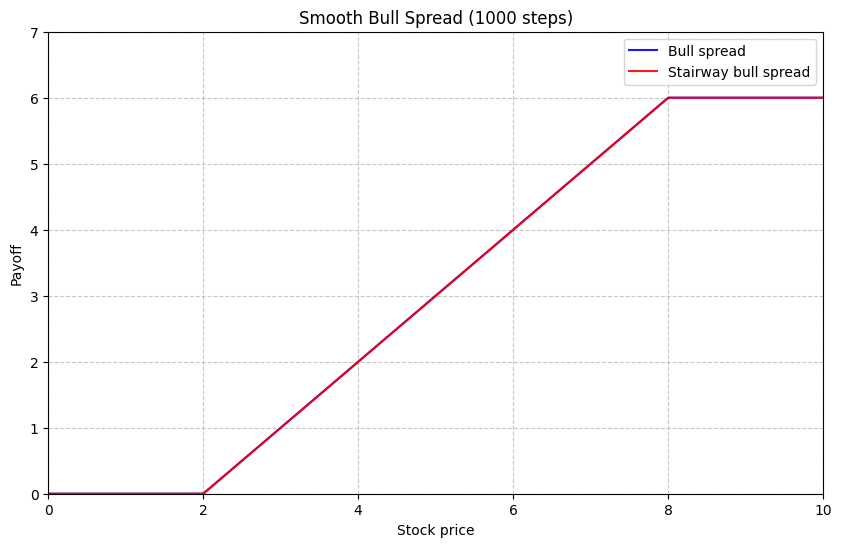

Bull spread: 3.0681
Stairway bull spread: 1.5341


In [23]:
### your code for 6(c) ###
plot_bull_spread(num_steps=1000)
plt.title('Smooth Bull Spread (1000 steps)')

plt.show()

### computing pice 
import numpy as np
from scipy.stats import norm

# Parameters
S = 5  # stock price
r = 0.05  # risk free rate
T = 1  # time to maturity
v = 0.25  # volatility
lower_strike = 2
upper_strike = 8
num_steps = 1000

# Calculate bull spread using Black-Scholes
def black_scholes_call(S, K, r, T, v):
    """Calculate Black-Scholes call option price"""
    d1 = (np.log(S/K) + (r + 0.5 * v**2) * T) / (v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Calculate bull spread value at S=5
bull_spread_value = black_scholes_call(S, lower_strike, r, T, v) - black_scholes_call(S, upper_strike, r, T, v)

# Calculate stairway bull spread by simulating 1000 steps
step_size = (upper_strike - lower_strike) / num_steps
step_payoff = bull_spread_value / num_steps  # payoff per step

# Calculate total payoff up to S=5
steps_completed = int((S - lower_strike) / step_size)
stairway_value = steps_completed * step_payoff

print(f"Bull spread: {bull_spread_value:.4f}")
print(f"Stairway bull spread: {stairway_value:.4f}")

##########################

##### Your output should be:

Bull spread: **3.0681**

Stairway bull spread: **3.0654**

<img src="stairway3.png" style="width: 500px;"/>

***

## Question 7: Black-Scholes-Merton European Put Option Formula (2 points)

$P_{0} = K\exp^{-rT}\mathcal{N}(-d_2) - S_{t}\mathcal{N}(-d_1)$ 

$d_1 = \frac{\ln(\frac{S_0}{K}) + (r + \frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$

$d_2 = d_1 - \sigma\sqrt{T}$

Derive the above **European put option** formula under the **martingale pricing approach**:

**Please fill in your answers below:** 
The dynamics of the asset price $S_{t}$ under  $\mathbb{Q} $ are given by:

$dS_t = r S_t \, dt + \sigma S_t \, dW_t^{\mathbb{Q}}$

Define the Payoff of the European Put Option: ( fix here !!! )

$P_T = \max(K - S_T, 0) = (K - S_T)$

Express the Option Price as the Expected Discounted Payoff:

$P_{0} = e^{-rT} \mathbb{E}^{\mathbb{Q}} \left[ (K - S_T) \right]$

Model the Asset Price at Maturity(Taking the natural logarithm):


$\ln S_T = \ln S_0 + \left(r - \frac{1}{2}\sigma^2\right)T + \sigma \sqrt{T} Z$

Calculate the Expected Payoff:

$\mathbb{E}^{\mathbb{Q}} \left[ (K - S_T)^+ \right] = K \mathcal{N}(-d_2) - S_0 \mathcal{N}(-d_1)$

Substitute Back into the Option Price Formula:


$P_{0} = e^{-rT} \left[ K \mathcal{N}(-d_2) - S_0 \mathcal{N}(-d_1) \right]$


$P_{0} = K e^{-rT} \mathcal{N}(-d_2) - S_{0} \mathcal{N}(-d_1)$

## Question 8: Charm (Delta Decay) (2 points)

Charm (Delta Decay) of a derivative captures the instantaneous change of **delta** over **time**.

$ \text{Charm} = - \frac{\partial\Delta}{\partial\tau} = \frac{\partial\theta}{\partial S} = \frac{\partial^2 V}{\partial\tau \partial S} $

Using the **Black-Scholes-Merton** formula and letting $\tau = T- t$, derive the following Charm formula for **European Call Option**:

$ \text{Charm}_{c} = -\mathcal{N}'(d_1)\left[\frac{2r\tau - \sigma\sqrt{\tau}d_2}{2\sigma\tau\sqrt{\tau}} \right]$

**Please fill in your answers below:**
Express Delta ($ \Delta$):

$
\Delta = \frac{\partial P}{\partial S} = \mathcal{N}(d_1)
$

Compute  $\frac{\partial d_1}{\partial \tau} $:

$
\frac{\partial d_1}{\partial \tau} = \frac{\sigma \sqrt{\tau} \left(r + \frac{1}{2}\sigma^2\right) - \frac{1}{2} \sigma \tau^{-1/2} \left(\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)\tau \right)}{\sigma^2 \tau}
$

$
\frac{\partial d_1}{\partial \tau} = \frac{1}{2\sigma \tau \sqrt{\tau}} \left( \left(2r + \sigma^2\right)\tau - \ln\left(\frac{S_0}{K}\right) \right)
$

Recall that:

$
\left(2r + \sigma^2\right)\tau - \ln\left(\frac{S_0}{K}\right) = 2r\tau - \sigma \sqrt{\tau} d_2
$

This follow from:

$
d_2 = d_1 - \sigma \sqrt{\tau} = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r - \frac{1}{2}\sigma^2\right)\tau}{\sigma \sqrt{\tau}}
$

Multiplying both sides by  $\sigma \sqrt{\tau}$ :

$
\left(2r + \sigma^2\right)\tau - \ln\left(\frac{S_0}{K}\right) = 2r\tau - \sigma \sqrt{\tau} d_2
$

Thus:

$
\frac{\partial d_1}{\partial \tau} = \frac{2r\tau - \sigma \sqrt{\tau} d_2}{2\sigma \tau \sqrt{\tau}}
$

Substitute Back into the Charm Formula:

$
\text{Charm} = - \mathcal{N}{\prime}(d_1) \cdot \frac{\partial d_1}{\partial \tau} = - \mathcal{N}{\prime}(d_1) \cdot \frac{2r\tau - \sigma \sqrt{\tau} d_2}{2\sigma \tau \sqrt{\tau}}
$

$
\text{Charm}_{c} = -\mathcal{N}{\prime}(d_1)\left[\frac{2r\tau - \sigma\sqrt{\tau}d_2}{2\sigma\tau\sqrt{\tau}} \right] 
$

In [6]:
%%html
<style> table {float:left} </style>

## Question 9: Hedging a Portfolio of Options (2 points)

A bank has the following outstanding OTC options exposures on a particular underlying asset:

| Options | Position | Delta | Gamma | Vega |
| :- | -: | -: | -: | -: |
| Call | -1000 | 0.5 | 2.2 | 1.8 |
| Call | -500 | 0.8 | 0.6 | 0.2 |
| Put | -2000 | -0.4 | 1.3 | 0.7 |
| Call | -500 | 0.7 | 1.8 | 1.4 |

One **exchange traded option** on the same underlying asset has a Delta of 0.6, a Gamma of 1.5, and a Vega of 0.8.

Another **exchange traded option** on the same underlying asset has a Delta of 0.1, a Gamma of 0.5, and a Vega of 0.6.

You have to implement a **Delta-Gamma-Vega** hedge for this bank's option portfolio. 

How many units of the **exchange traded option** and the **underlying asset** you have to buy/sell to **remove exposures towards all three option Greeks**?

**Please fill in your answers below:**
1.Calculate Total Greeks of the Bank’s Portfolio:

Total Delta ( $\Delta_{\text{total}}$ ):

$
\Delta_{\text{total}} = (-1000 \times 0.5) + (-500 \times 0.8) + (-2000 \times (-0.4)) + (-500 \times 0.7) = -500 -400 +800 -350 = -450
$

Total Gamma ( $\Gamma_{\text{total}}$ ):

$
\Gamma_{\text{total}} = (-1000 \times 2.2) + (-500 \times 0.6) + (-2000 \times 1.3) + (-500 \times 1.8) = -2200 -300 -2600 -900 = -6000
$

Total Vega ( $\text{Vega}_{\text{total}}$ ):

$
\text{Vega}_{\text{total}} = (-1000 \times 1.8) + (-500 \times 0.2) + (-2000 \times 0.7) + (-500 \times 1.4) = -1800 -100 -1400 -700 = -4000
$

2.Define Variables for Hedging Instruments:

Let:

$x$  = Number of units of Option A to buy/sell

$y$  = Number of units of Option B to buy/sell

$z$  = Number of units of the underlying asset to buy/sell

3.Set up the Hedging Equation:

Delta Hedge:

$\Delta_{\text{total}} + x \times \Delta_A + y \times \Delta_B + z \times \Delta_S = 0$

$-450 + 0.6x + 0.1y + 1z = 0 \quad $

Gamma Hedge:

$\Gamma_{\text{total}} + x \times \Gamma_A + y \times \Gamma_B + z \times \Gamma_S = 0$

$-6000 + 1.5x + 0.5y + 0z = 0 \quad $

Vega Hedge:

$\text{Vega}_{\text{total}} + x \times \text{Vega}_A + y \times \text{Vega}_B + z \times \text{Vega}_S = 0$

$-4000 + 0.8x + 0.6y + 0z = 0 \quad$

4.Interpret the Results:
Option A:  $x$ = 3200  units bought

Option B:  $y$ = 2400  units bought

Underlying Asset:  $z$ = 1710  units sold

## Question 10: Monte Carlo Simulation for Pricing Barrier Options (4 points)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)

nsim = 500

nstep = 260 # trading days in a year
T = 1
dt = T/nstep

r = 0.05
sigma = 0.25
S_0 = 100

e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))

S_t = S_0*np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * e).cumprod(axis=1)

#### (a) Knock-in Up and In Call Option [2 out of 4 points]

$ H = 110 $

$ K = 120 $

If $ S_\tau > H $, the call option is activated.

You should get **5.9656**.

In [8]:
### your code for 10(a) ###

H = 110
K = 120

# Identify the paths where the stock price hits the barrier
barrier_hit = np.any(S_t > H, axis=1)

# Calculate the payoff for the paths where the barrier is hit
payoff = np.maximum(S_t[:, -1] - K, 0) * barrier_hit

# Calculate the option price
call_price = np.mean(np.exp(-r * T) * payoff)

print("Knock-in Up and In Call Option Price:", round(call_price, 4))



Knock-in Up and In Call Option Price: 5.9656


#### (b) Knock-out Down and Out Put Option [2 out of 4 points]

$ H = 90 $

$ K = 100 $

If $ S_\tau < H$, the put option is expired.

You should get **0.1056**.

In [9]:
### your code for 10(b) ###

H = 90
K = 100

# Identify the paths where the stock price hits the barrier
barrier_hit = np.any(S_t < H, axis=1)

# Calculate the payoff for the paths where the barrier is not hit ( by ~ )
payoff = np.maximum(K - S_t[:, -1], 0) * ~barrier_hit

# Calculate the option price
put_price = np.mean(np.exp(-r * T) * payoff)

print("Knock-out Down and Out Put Option Price:", round(put_price, 4))



Knock-out Down and Out Put Option Price: 0.1056


### Question 11: Convergence of Monte Carlo Option Pricing Model (2 points)

In this part, you will need the following:
1. A procedure of pricing derivatives with Monte Carlo stimulation
2. A function of Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the **number of simulations** in the Monte Carlo procedure. 

Finally, plot Monte Carlo call prices computed with different numbers of steps versus the BSM call price. An example output is attached below.


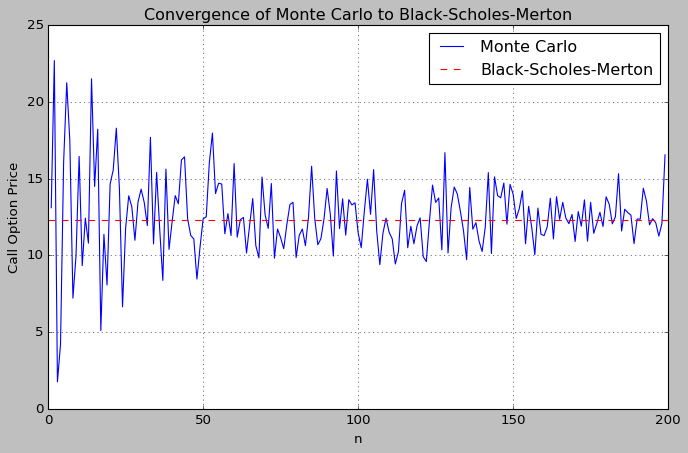

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(5)

# Parameters
S = 100
K = 100
v = 0.25
r = 0.05
T = 1

# Black-Scholes-Merton (BSM) call option price
def bsm_call(S, K, r, v, T):
    d1 = (np.log(S/K) + (r + v**2/2)*T) / (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

# Monte Carlo call option price
def mc_call(S, K, r, v, T, n_sims):
    dt = T / n_sims
    z = np.random.normal(0, 1, (n_sims, n_sims))
    S_t = S * np.exp((r - 0.5*v**2)*dt + v*np.sqrt(dt)*z).cumprod(axis=1)
    return np.exp(-r*T) * np.mean(np.maximum(S_t[:, -1] - K, 0))

# Plot convergence
n_sims_list = np.arange(1, 200, 1)
mc_prices = [mc_call(S, K, r, v, T, n) for n in n_sims_list]
bsm_price = bsm_call(S, K, r, v, T)

plt.figure(figsize=(10, 6))
plt.plot(n_sims_list, mc_prices, label='Monte Carlo')
plt.axhline(bsm_price, color='r', linestyle='--', label='Black-Scholes-Merton')
plt.xlabel('n')
plt.ylabel('Call Option Price')
plt.title('Convergence of Monte Carlo to Black-Scholes-Merton')
plt.legend()
plt.grid()
plt.show()

Your output should be similar to:

<img src="monte_carlo_convergence.png" style="width: 500px;"/>

### Question 12: Pricing of an exchange option (3 points)

#### (a) Numerical solution [2 out of 3 points]:

The payoff of an exchange option is defined as:

$ V_{\text{exchange},T} =  \max[S_{1,T} - S_{2,T}, 0] $

where $S_{1,T}$ and $S_{2,T}$ are the prices of two underlying assets on the expiration date. In this section, price an exchange option using the Monte Carlo simulation method. You should generate two price processes that are correlated.

## revise ~~~!! 
1. use np.linalg.cholesky to make correlated shocks and the answer will be 14.353;

or

2. use np.random.multivariate_normal to generate correlated shocks and the answer will be 14.2518.

In [15]:

import numpy as np
import pandas as pd

np.random.seed(5)

S1 = 50
S2 = 40
V1 = 0.3
V2 = 0.25
Rho = -0.5
r = 0.05
T = 1

n_stk = 2
n_sim = 1000000

# Step 1: Generate correlated random variables
Z1 = np.random.normal(0, 1, n_sim)
Z2 = Rho * Z1 + np.sqrt(1 - Rho**2) * np.random.normal(0, 1, n_sim)

# Step 2: Simulate asset prices at expiration
S1_T = S1 * np.exp((r - 0.5 * V1**2) * T + V1 * np.sqrt(T) * Z1)
S2_T = S2 * np.exp((r - 0.5 * V2**2) * T + V2 * np.sqrt(T) * Z2)

# Step 3: Calculate the payoff for each simulation
payoffs = np.maximum(S1_T - S2_T, 0)

# Step 4: Discount the average payoff back to present value
option_price = np.exp(-r * T) * np.mean(payoffs)

# Print the result rounded to four decimal places
print(f"Monte Carlo Exchange option price:\n{option_price:.4f}")


Monte Carlo Exchange option price:
14.3612


##### Your output should be:

Monte Carlo Exchange option price:
**14.3612**

#### (b) Analytical solution [1 out of 3 points]:

The analytical pricing formula for an exchange option is:

$V_{\text{exchange},t} = S_{1,t}N(\tilde{d}_1) - S_{2,t}N(\tilde{d}_2)$

where:

$ \tilde{d}_1 = \frac{1}{\tilde{\sigma}\sqrt{T-t}}[\ln(\frac{S_{1}}{S_{2}}) + (\frac{\tilde{\sigma}^2}{2})(T-t)] $

$ \tilde{d}_2  = \tilde{d}_1 - \tilde{\sigma}\sqrt{T-t} $

$ \tilde{\sigma}^2 = \sigma_{1}^2 + \sigma_{2}^2 - 2\rho\sigma_{1}\sigma_{2} $

Please define the pricing function of the analytical formula and compare the result with the Monte Carlo simulation.

In [13]:
### your code for 12(b) below ###
from scipy.stats import norm

def analytical_exchange_option_price(S1, S2, V1, V2, Rho, T):
    # Calculate sigma tilde
    sigma_tilde_squared = V1**2 + V2**2 - 2 * Rho * V1 * V2
    sigma_tilde = np.sqrt(sigma_tilde_squared)
    
    # Calculate d1 tilde and d2 tilde
    d1 = (np.log(S1 / S2) + 0.5 * sigma_tilde_squared * T) / (sigma_tilde * np.sqrt(T))
    d2 = d1 - sigma_tilde * np.sqrt(T)
    
    # Calculate the option price
    price = S1 * norm.cdf(d1) - S2 * norm.cdf(d2)
    return price

# Calculate the analytical price
analytical_price = analytical_exchange_option_price(S1, S2, V1, V2, Rho, T)

# Print the result rounded to four decimal places
print(f"Analytical Exchange option price:\n{analytical_price:.4f}")


Analytical Exchange option price:
14.3722


##### Your output should be:

Analytical Exchange option price:
**14.3722**

## Question 13: Implied volatility (3 points)

The sample code below solves:

$ y = x^3 - 2x^2 + 1 $ and $ y = 10 $

by the **method of bisection**

<div class="alert alert-block alert-success">
<b>Example:</b> 
    
    def f(x):
    y = x**3 - 2*x**2 + 1
    return y

    max_iter = 100
    precision = 1.0e-3

    y_actual = 10
    lg = 0
    ug = 5

    for i in range(0, max_iter):

        ylg = f(lg) - y_actual

        mg = (lg + ug)/2
        y = f(mg) - y_actual


        if (ylg * y) < 0:
            ug = mg
        else:
            lg = mg

        print('*** This is loop #'+str(i)+' ***')
        print('The guess for x is ' + str(round(mg,3)) + ' and the y value is ' + str(round(y,3)))

        if (abs(y) < precision):
            break # end the loop
</div>

**Modify** the above **method of bisection** code to find the implied volatility of an **European call option** with the **Black-Scholes-Merton** call price of **\$3.743**.

The model parameters are as follows:
- S = 13
- K = 10
- r = 0.05
- T = 1

In [14]:
### your code below ###

import numpy as np
from scipy import stats

def BS_call(S, K, r, T, v):
    d1 = (np.log(S/K) + (r + 0.5 * v**2)*T)/(v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    Call = S * stats.norm.cdf(d1,0.0,1.0) - K * np.exp(-r*T) * stats.norm.cdf(d2,0.0,1.0)
    return Call

def find_implied_volatility(S, K, r, T, c_actual):
    max_iter = 100
    precision = 1.0e-3

    lg = 0.01
    ug = 1.0

    for i in range(0, max_iter):
        mg = (lg + ug) / 2
        c = BS_call(S, K, r, T, mg)
        diff = c - c_actual

        print(f'*** This is loop #{i} ***')
        print(f'The guess for volatility is {round(mg, 3)} and the call price is {round(c, 3)}')

        if abs(diff) < precision:
            return mg

        if c > c_actual:
            ug = mg
        else:
            lg = mg

    return None  # Failed to converge

# Test the function
S = 13
K = 10
r = 0.05
T = 1
c_actual = 3.743

implied_vol = find_implied_volatility(S, K, r, T, c_actual)

if implied_vol is not None:
    print(f'The implied volatility is: {round(implied_vol, 3)}')
else:
    print('Failed to find the implied volatility')

*** This is loop #0 ***
The guess for volatility is 0.505 and the call price is 4.391
*** This is loop #1 ***
The guess for volatility is 0.258 and the call price is 3.643
*** This is loop #2 ***
The guess for volatility is 0.381 and the call price is 3.975
*** This is loop #3 ***
The guess for volatility is 0.319 and the call price is 3.794
*** This is loop #4 ***
The guess for volatility is 0.288 and the call price is 3.714
*** This is loop #5 ***
The guess for volatility is 0.304 and the call price is 3.753
*** This is loop #6 ***
The guess for volatility is 0.296 and the call price is 3.733
*** This is loop #7 ***
The guess for volatility is 0.3 and the call price is 3.743
The implied volatility is: 0.3
